<a href="https://colab.research.google.com/github/aleksey-sut/portfolio/blob/main/%22keras_digits_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [21]:
y_train_cat[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

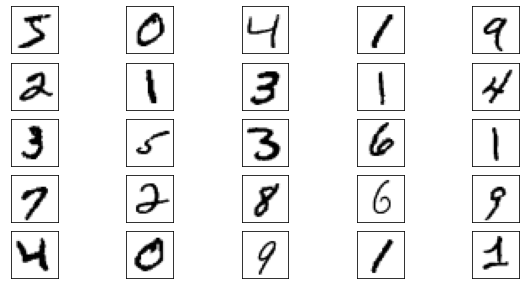

In [12]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [13]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), #растягивает иизображение (массив 28,28,1 в вектор)
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2865 - accuracy: 0.9178 - val_loss: 0.1559 - val_accuracy: 0.9554
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1278 - accuracy: 0.9622 - val_loss: 0.1088 - val_accuracy: 0.9683
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0875 - accuracy: 0.9740 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.0944 - val_accuracy: 0.9720
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0870 - val_accuracy: 0.9747


In [16]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9748


[0.08383768051862717, 0.9747999906539917]

Предсказание 1-й картинки из тестовой выборки

1/1 [==============================] - 0s 17ms/step
[[3.9044230e-11 2.2652373e-05 9.9997115e-01 6.0478119e-06 3.8446745e-15
  1.1426563e-08 4.7089643e-09 6.8437432e-13 1.7268879e-07 2.9096422e-13]]
2


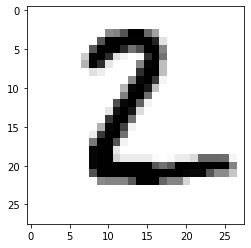

In [19]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [20]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 0s 2ms/step


In [22]:
print(pred.shape)

(10000,)


In [23]:
print(pred[:20])
print(y_test[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [24]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

[ True  True  True  True  True  True  True  True  True  True]


In [26]:
x_false = x_test[~mask]
y_false = x_test[~mask]
print(x_false.shape)

(252, 28, 28)


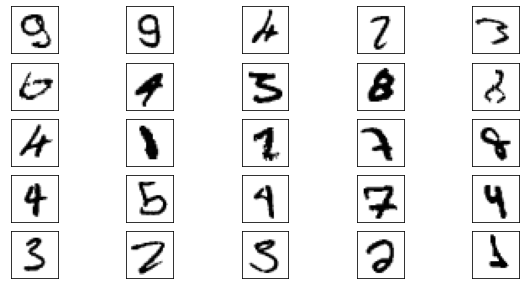

In [27]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()